# main imports

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# load and explore dataset

In [2]:
df_raw = pd.read_csv('kc_house_data.csv')

In [3]:
df_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [4]:
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df_raw.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- 'price' is the target

In [7]:
df_raw['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

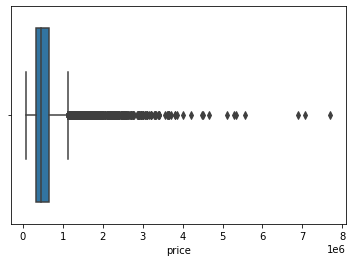

In [8]:
sns.boxplot(x=df_raw['price'])

- most prices are between 0 and 3 million
- at the first moment we will consider all dataset, but after making our models, we will test another models using houses that have price above 3 milion or any other value that our models show us to see if we can predict better without outlier prices

#### correlation with price

In [9]:
price_corr = df_raw.corr()['price'].sort_values(ascending=False)
print(price_corr.loc[price_corr < 0.3])

waterfront      0.266369
floors          0.256794
yr_renovated    0.126434
sqft_lot        0.089661
sqft_lot15      0.082447
yr_built        0.054012
condition       0.036362
long            0.021626
id             -0.016762
zipcode        -0.053203
Name: price, dtype: float64


##### now we're going to create some datasets to train our models
- first, let's consider date as year and month only, to have a numerical feature

In [10]:
df_raw['year_month'] = [x[0:6] for x in df_raw['date']]
df_raw['year_month']

0        201410
1        201412
2        201502
3        201412
4        201502
          ...  
21608    201405
21609    201502
21610    201406
21611    201501
21612    201410
Name: year_month, Length: 21613, dtype: object

##### creation of some dataframes:
- in the first one we drop 'id' and 'date' features

In [11]:
df_no_id_date = df_raw.drop(labels=['id', 'date'], axis=1)

In [12]:
def plot_all_features(df_to_plot, plot_cols = 3):
    plot_rows = math.ceil(len(df_to_plot.columns) / plot_cols)
    f, axes = plt.subplots(plot_rows, plot_cols,figsize=(15,25))
    axes = axes.flatten()

    for indext, col in enumerate(df_to_plot.columns):
        sns.scatterplot(x=str(col),y='price', data=df_to_plot, ax=axes[indext])
        title = col + ' vs Price Box Plot'
        axes[indext].set(xlabel=str(col), ylabel='Price')
    plt.plot()

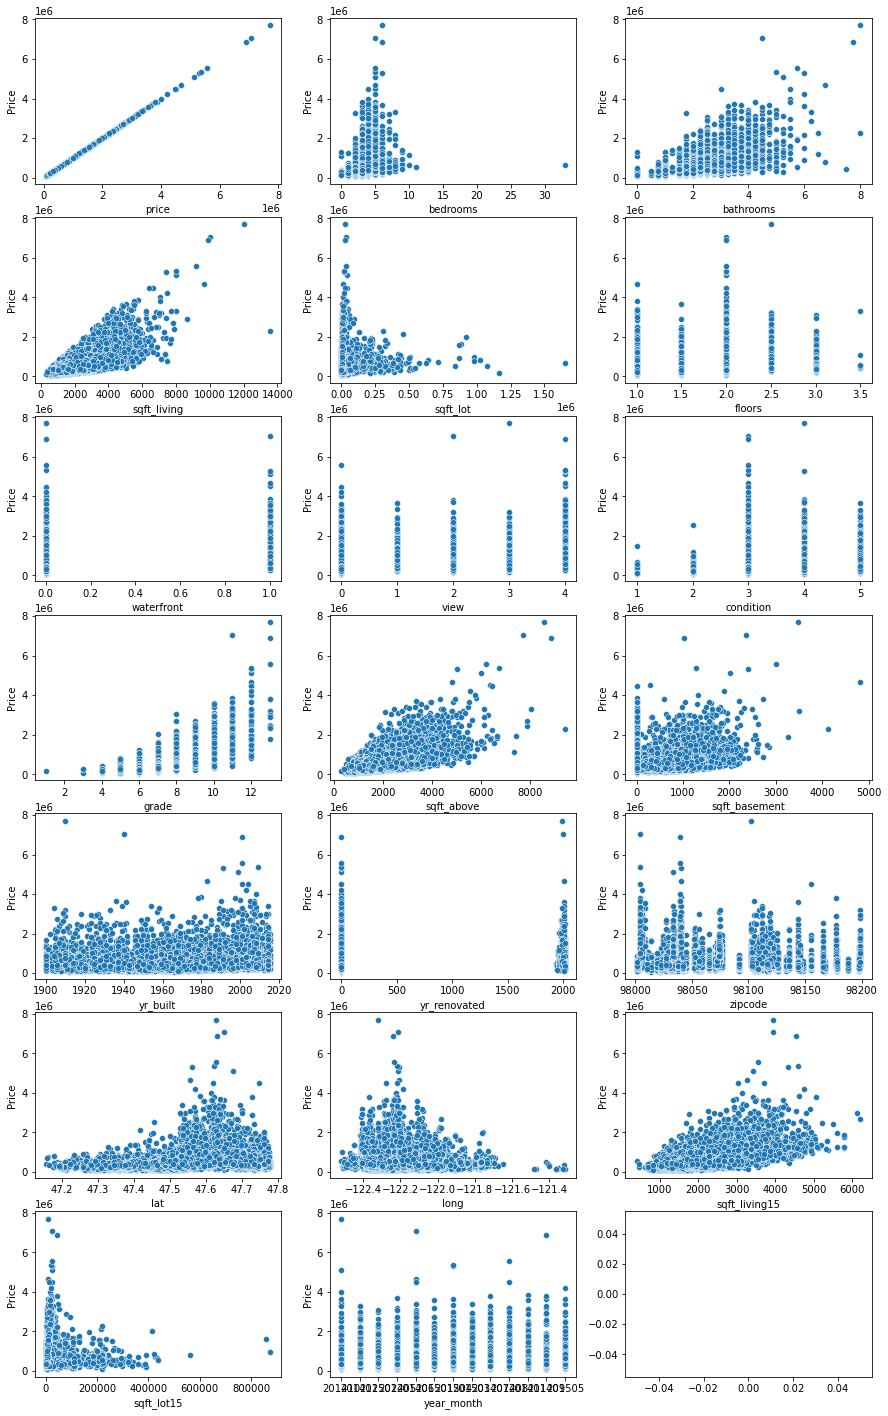

In [13]:
# plot correlation with 'price'
plot_all_features(df_no_id_date)

- it seems to have an outlier in the bedroom feature (no other house has more than 15 bedrooms and the price of this house is relatively low)

In [14]:
df_no_id_date.drop(df_no_id_date.loc[df_no_id_date['bedrooms'] == 33].index, inplace=True)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

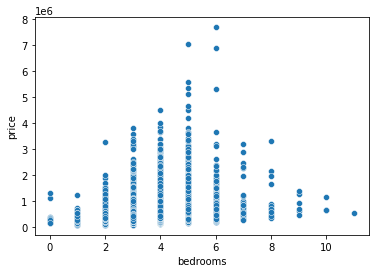

In [17]:
sns.scatterplot(x=df_no_id_date['bedrooms'], y=df_no_id_date['price'])

- in the second one we drop features that have correlation absolute value less than 0.03 ('id', 'long') and also drop 'zipcode' and 'lat' features because they are geographycal features and we don't want to consider them for testing

In [18]:
df_no_geo = df_no_id_date.drop(labels=['zipcode', 'lat', 'long'], axis=1)

In [19]:
# defining data_frame names to use in tests
data_frames = ['no_id_date', 'no_geo']

### split and scale X and y variables

In [56]:
def split_and_scale_dataset_by_name(df_name, scale_target=False):
    if df_name == 'no_geo':
        data_frame = df_no_geo
    elif df_name == 'no_id_date':
        data_frame = df_no_id_date
    else:
        data_frame = df_raw
    X = data_frame.drop(labels=['price'], axis=1).values
    y = data_frame['price'].values

    scaler_x = StandardScaler()
    X = scaler_x.fit_transform(X)
    scaler_y = None
    if scale_target:
        scaler_y = StandardScaler()
        y = scaler_y.fit_transform(y.reshape(-1,1)).ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    return X_train, X_test, y_train, y_test, scaler_y

# model training

In [57]:
def test_model(model_to_fit, scale_target=False):
    
    for df_name in data_frames:
        print('dataframe:', df_name)
        print('scale_target:', scale_target)
        X_train, X_test, y_train, y_test, scaler_y = split_and_scale_dataset_by_name(df_name, scale_target)
        print('X_train:', X_train.shape, '- y_train:', y_train.shape, '- X_test:', X_test.shape, '- y_test:', y_test.shape)
        model = model_to_fit.fit(X_train, y_train)
        prediction = model.predict(X_test)
        train_score = model.score(X_train, y_train)
        print('train score:', train_score)
        test_score = model.score(X_test, y_test)
        print('test score:', test_score)
        mae = mean_absolute_error(y_test, prediction)
        if scale_target:
            mae = scaler_y.inverse_transform([mae])
        print('mean_absolute_error:', mae)
        mse = mean_squared_error(y_test, prediction)
        if scale_target:
            mse = scaler_y.inverse_transform([mse])
        print('mean_squared_error:', mse)
        print('-'*30)

### method to write results to a file

In [23]:
def wtf(*text):
    '''
    writes to file
    '''
    if text == () or text is None:
        text = ''
    f_text = ' '.join(map(str, text))
    with open('results.txt', 'a') as f:
        f.write(f_text + '\n')
        print(f_text)

## linear regression

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
test_model(regressor)

dataframe: no_id_date
scale_target: False
X_train: (15128, 19) - y_train: (15128,) - X_test: (6484, 19) - y_test: (6484,)
train score: 0.7018853752032124
test score: 0.6990524685299917
mean_absolute_error: 127525.64073967286
mean_squared_error: 47665015213.152275
------------------------------
dataframe: no_geo
scale_target: False
X_train: (15128, 16) - y_train: (15128,) - X_test: (6484, 16) - y_test: (6484,)
train score: 0.650972143469601
test score: 0.6613655036255166
mean_absolute_error: 140746.15334232565
mean_squared_error: 53633995077.29965
------------------------------


## decision tree regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

#test_model(regressor)
test_model(regressor, scale_target=True)

dataframe: no_id_date
scale_target: True
X_train: (15128, 19) - y_train: (15128,) - X_test: (6484, 19) - y_test: (6484,)
train score: 0.9999999972316161
test score: 0.729438027909699
mean_absolute_error: [642772.5860283]
mean_squared_error: [656807.4464268]
------------------------------
dataframe: no_geo
scale_target: True
X_train: (15128, 16) - y_train: (15128,) - X_test: (6484, 16) - y_test: (6484,)
train score: 0.9999996406097872
test score: 0.5592357154501204
mean_absolute_error: [702296.68519548]
mean_squared_error: [730234.92128725]
------------------------------


## Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50)

test_model(regressor)
test_model(regressor, scale_target=True)

dataframe: no_id_date
scale_target: False
X_train: (15128, 19) - y_train: (15128,) - X_test: (6484, 19) - y_test: (6484,)
train score: 0.9812647398911117
test score: 0.8681583458229531
mean_absolute_error: 72133.94784896154
mean_squared_error: 20881495260.586216
------------------------------
dataframe: no_geo
scale_target: False
X_train: (15128, 16) - y_train: (15128,) - X_test: (6484, 16) - y_test: (6484,)
train score: 0.9623633015906036
test score: 0.7652060574973825
mean_absolute_error: 116654.37033496372
mean_squared_error: 37187402025.45432
------------------------------
dataframe: no_id_date
scale_target: True
X_train: (15128, 19) - y_train: (15128,) - X_test: (6484, 19) - y_test: (6484,)
train score: 0.9819797767657491
test score: 0.86595920991022
mean_absolute_error: [612347.72131928]
mean_squared_error: [597910.44606059]
------------------------------
dataframe: no_geo
scale_target: True
X_train: (15128, 16) - y_train: (15128,) - X_test: (6484, 16) - y_test: (6484,)
train sco

In [ ]:
# manually doing things
wtf('Random Forest Regressor:')
X = df_no_id_date.drop(labels=['price'], axis=1).values
y = df_no_id_date['price'].values

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1,1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


regressor = RandomForestRegressor(n_estimators = 50, random_state=1)
model = regressor.fit(X_train, y_train)

wtf('n_estimators = 50, random_state=1')

prediction = model.predict(X_test)

train_score = model.score(X_train, y_train)
wtf('train score:', train_score)

test_score = model.score(X_test, y_test)
wtf('test score:', test_score)

In [ ]:
mae = mean_absolute_error(y_test, prediction)
wtf('mean_absolute_error:', scaler_y.inverse_transform(mae))

mse = mean_squared_error(y_test, prediction)
wtf('mean_squared_error:', scaler_y.inverse_transform(mse))

wtf('-'*30)

## Multi-layer Perceptron regressor

In [64]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(20))

# test_model(regressor)
test_model(regressor, scale_target=True)

dataframe: no_id_date
scale_target: True
X_train: (15128, 19) - y_train: (15128,) - X_test: (6484, 19) - y_test: (6484,)
train score: 0.8876382470853712
test score: 0.8850705265654255
mean_absolute_error: [618891.95487801]
mean_squared_error: [589665.57733366]
------------------------------
dataframe: no_geo
scale_target: True
X_train: (15128, 16) - y_train: (15128,) - X_test: (6484, 16) - y_test: (6484,)
train score: 0.7572776202900376
test score: 0.7803578383369963
mean_absolute_error: [661212.19247642]
mean_squared_error: [634839.98284762]
------------------------------


In [ ]:
# manually doing things
wtf('MLPRegressor:')
X = df_no_id_date.drop(labels=['price'], axis=1).values
y = df_no_id_date['price'].values

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1,1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


regressor = MLPRegressor(hidden_layer_sizes=(18,18), random_state=1)
model = regressor.fit(X_train, y_train)

wtf('hidden_layer_sizes=(18,18), random_state=1')

prediction = model.predict(X_test)

train_score = model.score(X_train, y_train)
wtf('train score:', train_score)

test_score = model.score(X_test, y_test)
wtf('test score:', test_score)

In [ ]:
mae = mean_absolute_error(y_test, prediction)
wtf('mean_absolute_error:', scaler_y.inverse_transform(mae))

mse = mean_squared_error(y_test, prediction)
wtf('mean_squared_error:', scaler_y.inverse_transform(mse))

wtf('-'*30)

# model validation

- Random Forest Regressor and MLPRegressor seems to be the best models to our data, having score above 0.85
- we can also affirm that the geo features were important to our models fit
- now we have to validate the models with cross validation methods and sees which one gets better results

- but first, let's train without houses that have prices higher than 3 million

In [ ]:
sns.boxplot(x = df_no_id_date['price'])

In [ ]:
df_test = df_no_id_date[df_no_id_date['price'] < 1_500_000]
sns.boxplot(x = df_test['price'])

In [ ]:
df_test

In [ ]:
wtf('Random Forest Regressor:')
X = df_test.drop(labels=['price'], axis=1).values
y = df_test['price'].values

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1,1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


regressor = RandomForestRegressor(n_estimators = 50, random_state=1)
model = regressor.fit(X_train, y_train)

wtf('n_estimators = 50, random_state=1')

prediction = model.predict(X_test)

train_score = model.score(X_train, y_train)
wtf('train score:', train_score)

test_score = model.score(X_test, y_test)
wtf('test score:', test_score)

In [ ]:
y_test = scaler_y.inverse_transform(y_test)
prediction = scaler_y.inverse_transform(prediction)

mae = mean_absolute_error(y_test, prediction)
wtf('mean_absolute_error:', mae)

mse = mean_squared_error(y_test, prediction)
wtf('mean_squared_error:', mse)

wtf('-'*30)

In [ ]:
wtf('MLPRegressor:')
X = df_test.drop(labels=['price'], axis=1).values
y = df_test['price'].values

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1,1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


regressor = MLPRegressor(hidden_layer_sizes=(18,18), random_state=1, max_iter=400, tol=0.000001)
model = regressor.fit(X_train, y_train)

wtf('hidden_layer_sizes=(18,18), random_state=1')

prediction = model.predict(X_test)

train_score = model.score(X_train, y_train)
wtf('train score:', train_score)

test_score = model.score(X_test, y_test)
wtf('test score:', test_score)

In [ ]:
y_test = scaler_y.inverse_transform(y_test)
prediction = scaler_y.inverse_transform(prediction)

mae = mean_absolute_error(y_test, prediction)
wtf('mean_absolute_error:', mae)

mse = mean_squared_error(y_test, prediction)
wtf('mean_squared_error:', mse)

wtf('-'*30)

### cross validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
X = df_no_id_date.drop(labels=['price'], axis=1).values
y = df_no_id_date['price'].values

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1,1)).ravel()

In [ ]:
regressor = MLPRegressor(hidden_layer_sizes=(X.shape[1],X.shape[1]), random_state=1)
cvs_mlp = cross_validate(regressor, X, y, cv=10)

In [ ]:
cvs_mlp['test_score'].mean()

In [ ]:
regressor = RandomForestRegressor(n_estimators = 50, random_state=1)
cvs = cross_validate(regressor, X, y, cv=10)

In [ ]:
cvs['test_score'].mean()

In [ ]:
df_raw[df_raw['id'].duplicated(keep='last')].sort_values(by='id')